In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vaccum_perm = 4e-7*np.pi

def on_axis_B_field(z, I_l, I_r=0.0, num_turns=1.0, radius=1.0, d_to_centre=0.5,units="gauss",decomp=False,pick='left'):
    """
    Used to Graph On-Axis Magnetic Field from two coils \n
    z = the position of interest (meters) \n
    I_l = the current on the left coil (Amperes) \n
    I_r = the current on the right coil (Amperes) \n
    num_turns = the number of turn PER COIL \n
    radius = the radius of each coil (meters) \n
    d_to_centre = the distnace from each coil to the midpoint (meters) \n
    units = the desired units of field. Default 'gauss' can be set to 'tesla'
    decomp = True returns single coil, False returns both coils
    pcik = If decomp selected, returns the specifc coil <left,right>
    """
    def field_per_coil(zed, side='left'):
        side_selector_curr = {'left':I_l, 'right':I_r}
        side_selector_sign ={'left':np.add, 'right':np.subtract}
        return num_turns*(vaccum_perm/2)*(np.power(radius,2)*side_selector_curr[side])/np.power(np.power((side_selector_sign[side](zed,d_to_centre/2)),2)+np.power(radius,2),3/2)
    units_selector = {'gauss':1000, 'tesla':1}
    if not decomp:
        return (field_per_coil(z,side='left') + field_per_coil(z, side='right'))*units_selector[units]
    else:
        return field_per_coil(z,side=pick)*units_selector[units]

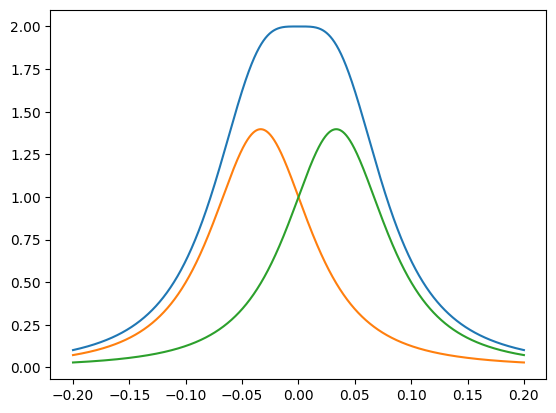

In [3]:
x_list = np.arange(-0.20,0.2,1e-6)

left_current = 1
right_current = 1
turns = 149.025
coil_radius = 0.067
my_units = 'gauss'

fig1, ax1 = plt.subplots()

ax1.plot(x_list, on_axis_B_field(x_list,left_current, right_current,turns,coil_radius,coil_radius,units=my_units))
ax1.plot(x_list, on_axis_B_field(x_list,left_current, right_current,turns,coil_radius,coil_radius,units=my_units,decomp=True,pick='left'))
ax1.plot(x_list, on_axis_B_field(x_list,left_current, right_current,turns,coil_radius,coil_radius,units=my_units,decomp=True,pick='right'))